# Model - XGBoost regressor

In [ ]:
# import packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# import packages for ML modelling
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle



### Import split data

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [ ]:
y_train.max()

sold_price    6600000
dtype: int64

## XGBoost

### Default setting

In [ ]:
# default setting

default_XGB = XGBRegressor().fit(X_train, y_train)


In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = default_XGB.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df_default = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df_default

,R2,MAE,MAPE
0,0.905,277417.42,0.0829


In [ ]:
default_XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### 🛑 stooop - GridSearch 

In [ ]:
xgboost_gridder = XGBRegressor()

parameters = {
    'learning_rate': [0.3], 
    'max_depth': [6],
    'subsample': [1],
    'n_estimators': [100, 500]}

xgb_grid = GridSearchCV(xgboost_gridder,
                        parameters,
                        cv = 3,
                        verbose=2)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=6, n_estimators=500, subsample=1; total time=   9.3s
[CV] END learning_rate=0.3, max_depth=6, n_estimators=500, subsample=1; total time=  10.5s
[CV] END learning_rate=0.3, max_depth=6, n_estimators=500, subsample=1; total time=  10.3s
0.8311817046524442
{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}


### 🛑 stooop - Model building - set best parameter

In [ ]:
xgb_reg_model = XGBRegressor(
    validate_parameters = True,
    eval_metric = 'mae', 
    n_estimators = 100,
    learning_rate= 0.3, 
    max_depth = 6,
    subsample =  0.7,
    #verbosity = 1
    )

xgb_reg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Evaluate

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = xgb_reg_model.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df

,R2,MAE,MAPE
0,0.9167,258061.43,0.0781


## Graph

178


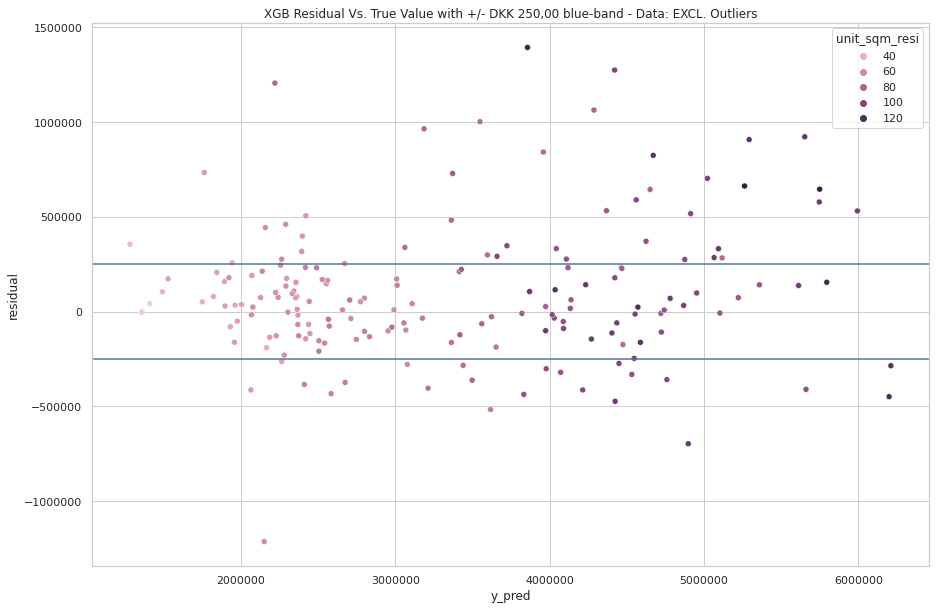

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# make results dataframe
df_results = pd.read_csv("X_test.csv")

df_results['y_true'] = y_true
df_results['y_pred'] = np.round(y_pred)
df_results['residual'] = df_results['y_true'] - df_results['y_pred'] 
df_results['residual_abs'] = abs(df_results['y_true'] - df_results['y_pred'])


# make chart for pred. and residuals 
sns.set(style='whitegrid', rc={"figure.figsize":(15, 10)})
 
sns.scatterplot(x= df_results.y_pred,
                    y=df_results.residual,
                    data=df_results,
                    hue=df_results.unit_sqm_resi,                   
                    )
plt.title('XGB Residual Vs. True Value with +/- DKK 250,00 blue-band - Data: EXCL. Outliers')

# ax lines 
plt.axhline(250000)
plt.axhline(-250000)

plt.ticklabel_format(style='plain')
plt.figure(figsize=(100,100))

print(len(y_pred))

In [ ]:
xgb_reg_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

### Feature importance

In [ ]:
feature_scores = pd.Series(xgb_reg_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[0:20]

unit_sqm_resi                    0.296446
gov_property_value               0.103272
gov_sqm                          0.029165
street_name_IslandsBrygge        0.028913
year_2021                        0.026378
street_name_Kongelundsvej        0.024905
street_name_Keplersgade          0.022447
street_name_Backersvej           0.022098
year_2022                        0.019673
street_name_ØrestadsBoulevard    0.017951
rooms                            0.017944
street_name_Reykjaviksgade       0.017464
street_name_Sundholmsvej         0.015550
latitude                         0.013422
street_name_Lyongade             0.011235
street_name_Halgreensgade        0.011114
street_name_Øresundsvej          0.010936
year_2019                        0.010830
street_name_Vermlandsgade        0.008420
street_name_Hallandsgade         0.006612
dtype: float32

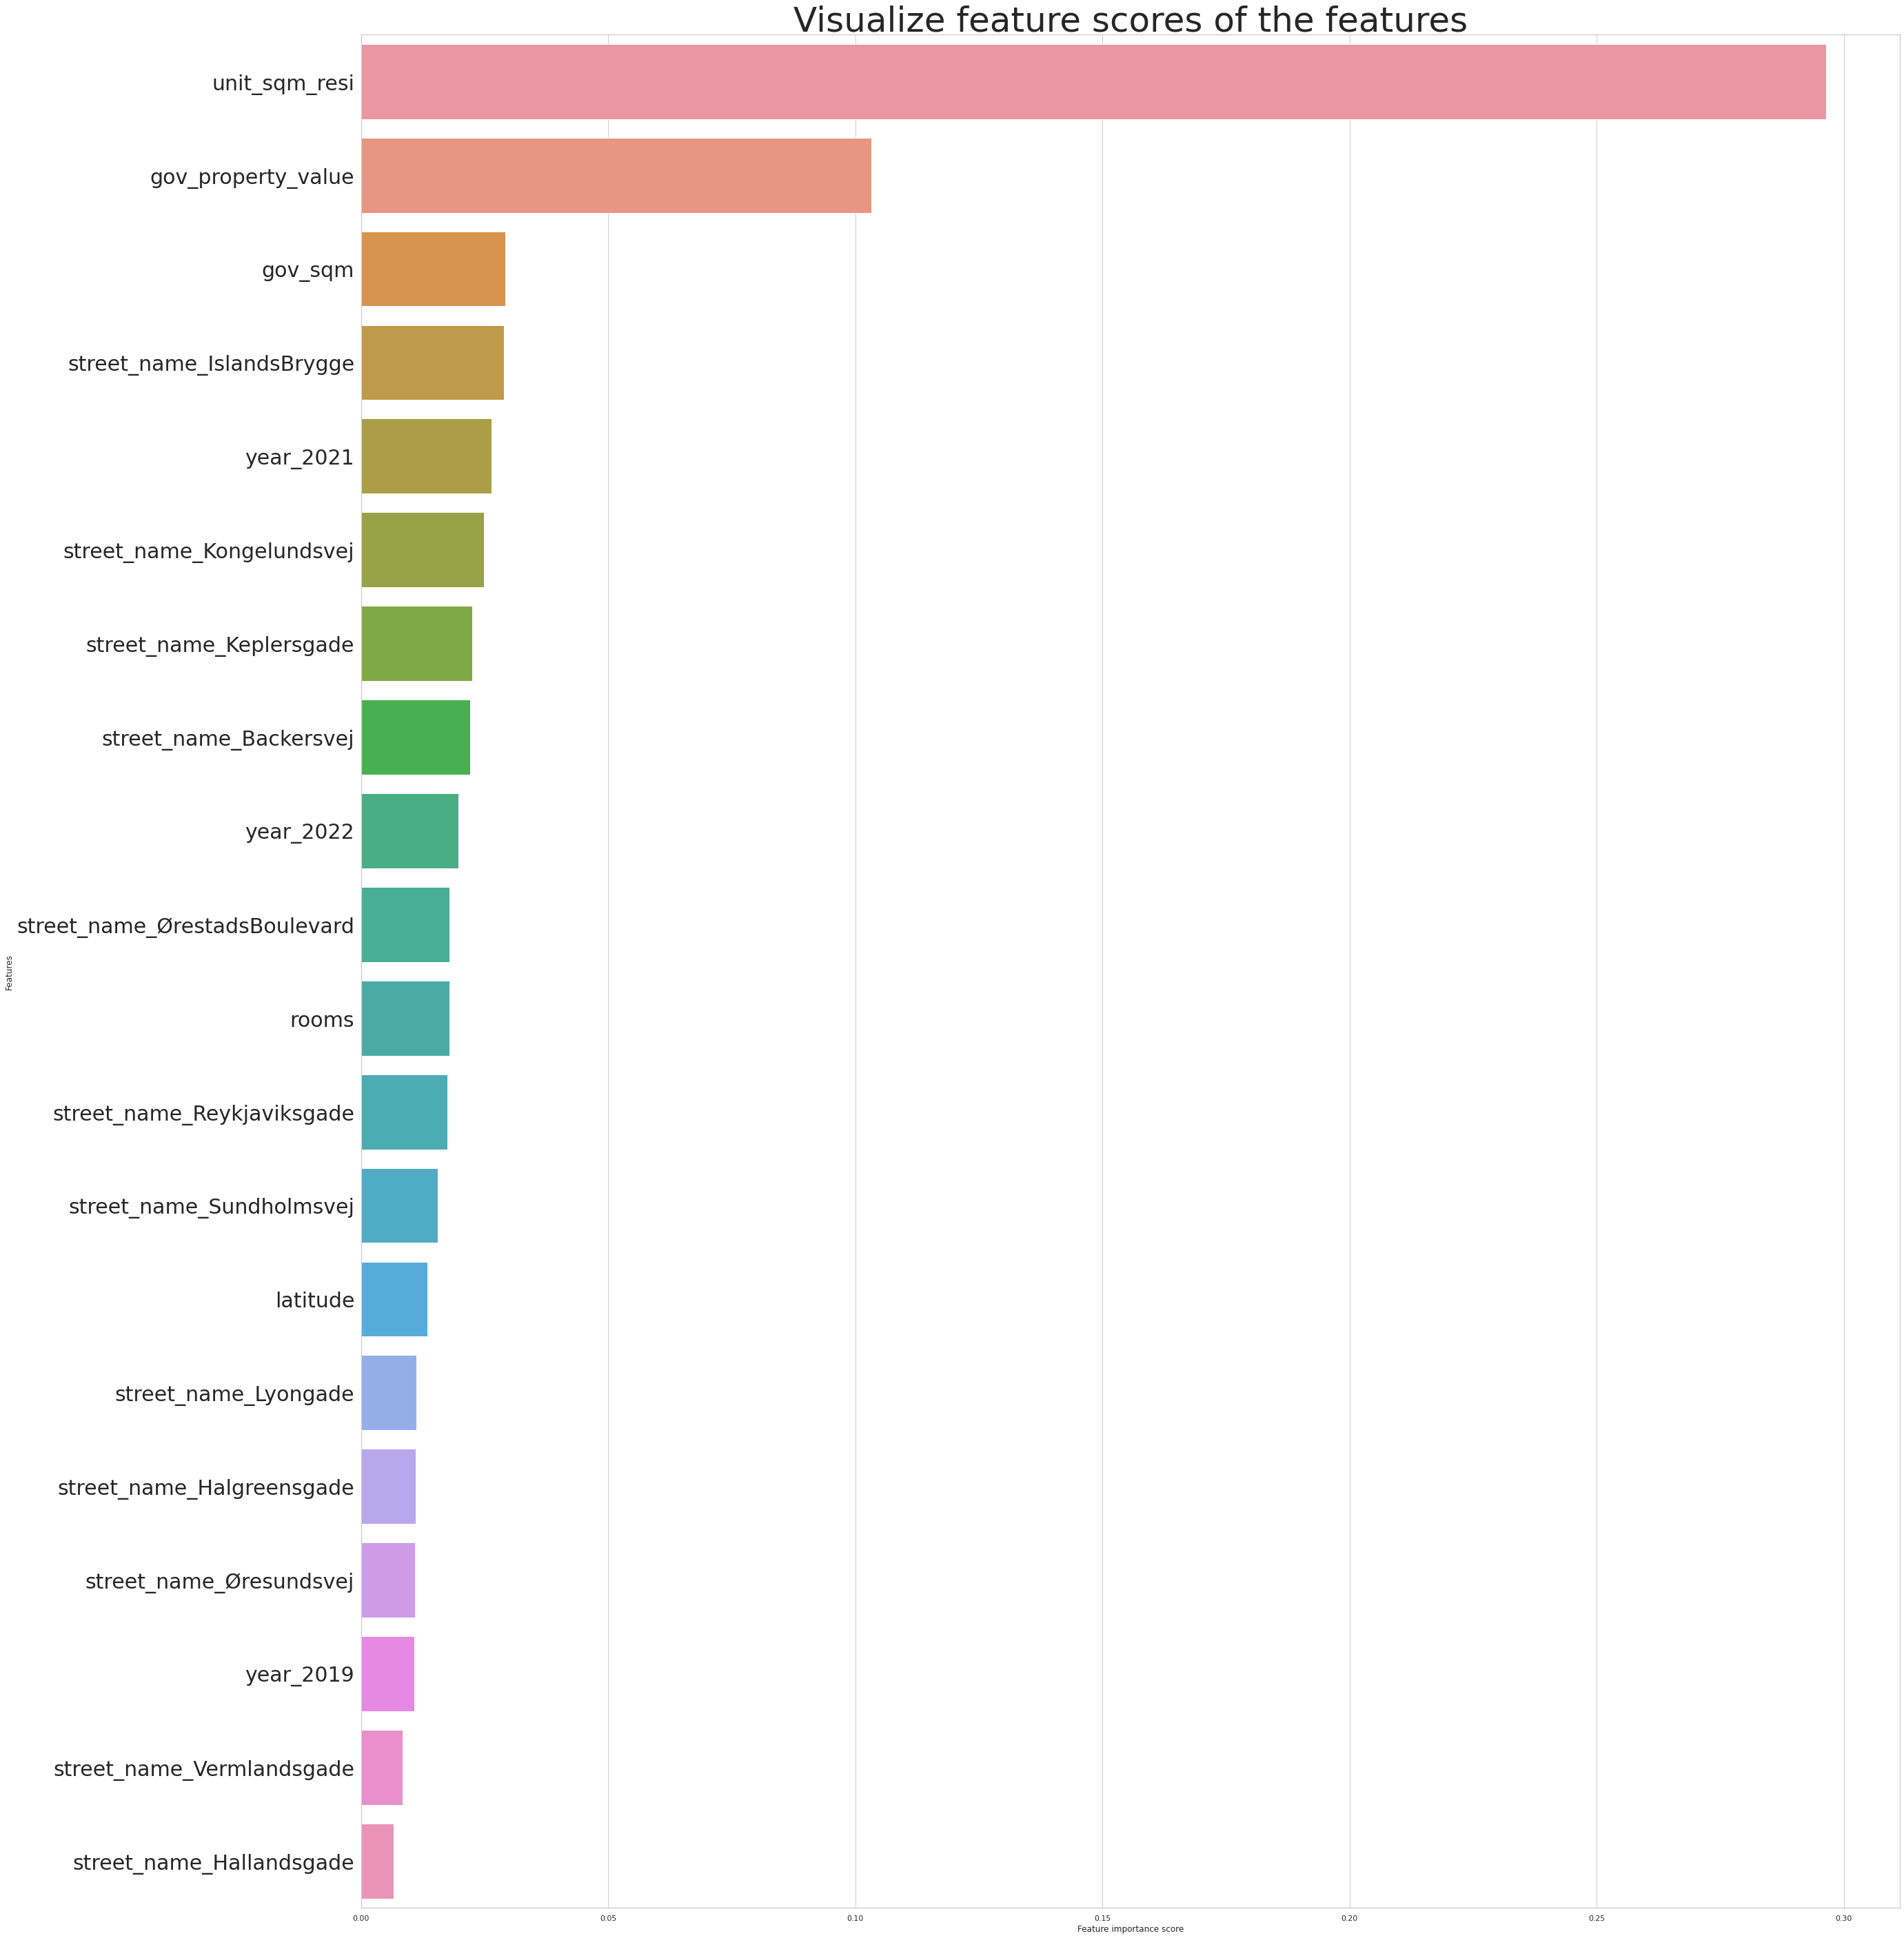

In [ ]:
f, ax = plt.subplots(figsize=(40, 50))
ax = sns.barplot(x=feature_scores[0:20], y=feature_scores[0:20].index)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores[0:20].index, fontsize=30)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Save or load model

In [ ]:
#save model to folder
with open('xgb_reg_model_pkl', 'wb') as files:
    pickle.dump(xgb_reg_model, files)

In [ ]:
# load saved model

"""
with open('xgb_reg_model_pkl' , 'rb') as f:
    xgb_reg_model = pickle.load(f)

xgb_reg_model.predict()
"""

"\nwith open('xgb_reg_model_pkl' , 'rb') as f:\n    xgb_reg_model = pickle.load(f)\n\nxgb_reg_model.predict()\n"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>